In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models

print(tf.__version__)


2.7.0


In [108]:
from data_processing import import_and_clean_train, label_encoding

train_X, test_X, train_y, test_y = import_and_clean_train('train')

train_X.pop('Id')
test_X.pop('Id')

train_X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,65.0,7800,5,7,1967,2004,89.0,450,0,...,0,0,0,1,0,0,0,0,1,0
1,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,20,90.0,12378,9,5,2003,2004,0.0,1274,0,...,0,0,0,1,0,0,0,0,1,0
3,20,70.0,7420,5,5,1962,1962,0.0,417,0,...,0,0,0,1,0,0,0,0,1,0
4,50,52.0,9439,5,5,1930,1950,0.0,324,0,...,0,0,0,1,0,0,0,0,1,0


Preprocessing: defining the normalizer and adapting it to the train set:

In [114]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_X))

gr = np.array(train_X['GrLivArea'])
gr_normalizer = tf.keras.layers.Normalization(axis=-1)
gr_normalizer.adapt(gr)
# print(normalizer.mean.numpy())

# train_X = normalizer(train_X)
# test_X = normalizer(test_X)

# train_X.head()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

ValueError: All `axis` values to be kept must have known shape. Got axis: (-1,), input shape: [None], with unknown axis at index: 0

Function to plot the loss (mean absolute error) at each epoch:

In [110]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 200000])
    plt.xlabel('Epoch')
    plt.ylabel('Error [SalePrice]')
    plt.legend()
    plt.grid(True)

Function to train and evaluate a model which layers are defined outside it:

In [111]:
def train_and_evaluate(model, train_x, train_y, val_x, val_y, epochs=100):

    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

    history = model.fit(x=train_X, y=train_y, validation_data=(val_x, val_y), verbose=0, epochs=epochs)
    
#     train_gen = preprocessing.image.ImageDataGenerator(**preprocess, **augment)
#     train_gen.fit(train_x) 

#     val_gen = preprocessing.image.ImageDataGenerator(**preprocess)
#     val_gen.fit(train_x)

#     history = model.fit(train_gen.flow(train_x, train_y), epochs=epochs, 
#                         validation_data=val_gen.flow(val_x, val_y))

    plot_loss(history)

Preliminary model:

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

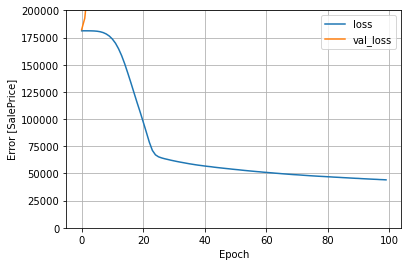

In [112]:
model = models.Sequential()
model.add(gr_normalizer)
model.add(layers.Dense(units=1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

train_and_evaluate(model, train_X['GrLivArea'], train_y['GrLivArea'], test_X, test_y, epochs=100)

Function to build and compile with layers defined inside it:

In [95]:
def build_and_compile_model(norm):
    model = keras.Sequential([
    norm,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.Adam(0.01))
    return model


In [96]:
dnn_model = build_and_compile_model(normalizer)

dnn_model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_8 (Normalizat  (None, 270)              541       
 ion)                                                            
                                                                 
 dense_129 (Dense)           (None, 64)                17344     
                                                                 
 dense_130 (Dense)           (None, 64)                4160      
                                                                 
 dense_131 (Dense)           (None, 1)                 65        
                                                                 
Total params: 22,110
Trainable params: 21,569
Non-trainable params: 541
_________________________________________________________________


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

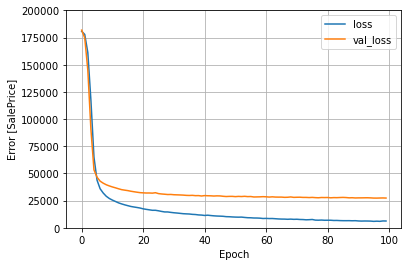

In [97]:
history = dnn_model.fit(
    train_X,
    train_y,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

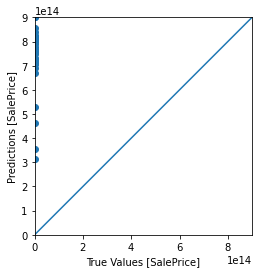

In [103]:
# display(test_predictions)

a = plt.axes(aspect='equal')
plt.scatter(test_y, test_predictions)
plt.xlabel('True Values [SalePrice]')
plt.ylabel('Predictions [SalePrice]')
lims = [0, 900000000000000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


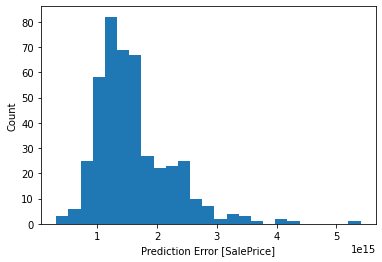

In [104]:
error = test_predictions - test_y
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [SalePrice]')
_ = plt.ylabel('Count')